In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import kitcolors as kit 
from matplotlib import colors 

In [18]:
file = "iso.csv"
nx = 50
testcase = 1

In [20]:
df = pd.read_csv(file)
df = df[df["nx"] == nx]
df = df[df["testcaseid"] == testcase]

In [24]:
#baseline_error =  df[df["convolutionmagnitude"] == 0].reset_index().iloc[0]["L2"]
baseline_error =12.246102672209034

df["normalizedL2"] = df["L2"] / baseline_error
df["sigmaTIMESbeta"] = df["convolutionwidth"] * df["convolutionmagnitude"]

df = df[ df["sigmaTIMESbeta"] < 300]
df = df[df["convolutionmagnitude"] > 0]

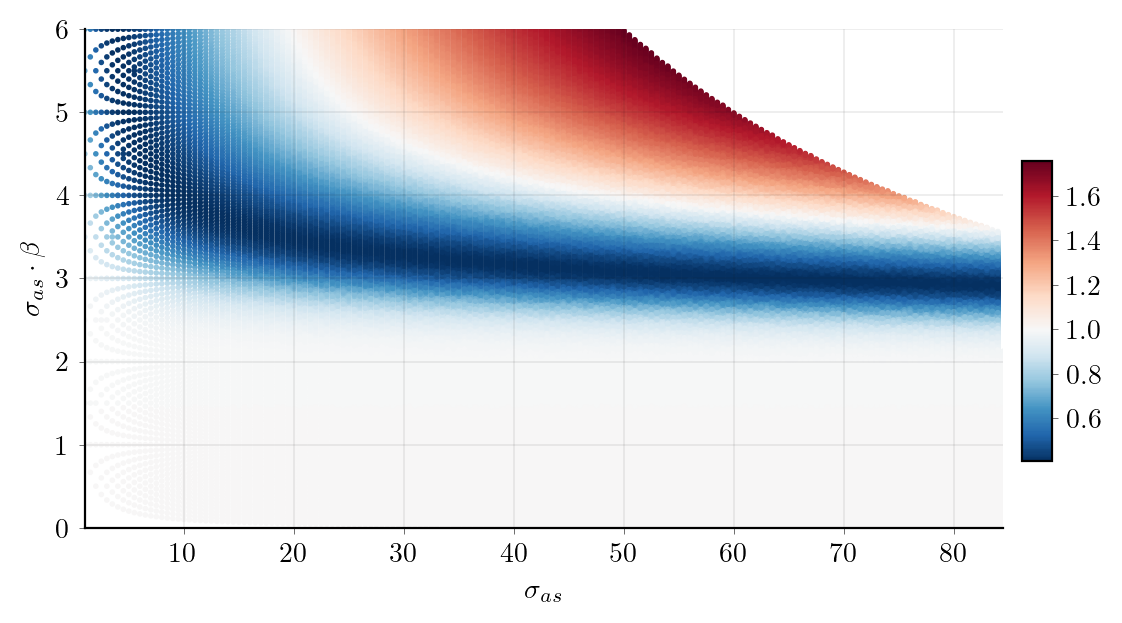

In [58]:
plt.style.use("kitish")
fig, ax = plt.subplots(figsize = (5,3))

x = df["convolutionmagnitude"]
y = df["convolutionwidth"]
#y = df["sigmaTIMESbeta"]
c = df["normalizedL2"]
divnorm = colors.TwoSlopeNorm(vmin=min(c), vcenter=1, vmax=max(c))


xx = np.linspace(min(x),max(x),1000)
yy = np.linspace(min(y),max(y),1000).T
zz = np.round(np.outer(xx,yy),2)

#CS = ax.contour(xx,yy,zz,levels = [10,25,100,150,250],colors = "k")
#ax.clabel(CS, inline=1, fontsize=10,colors = "k",fmt='%d')
image = ax.scatter(x,y,c = c,cmap = "RdBu_r",lw = 1,s = 1,norm = divnorm)
ax.set_ylim([0,6])
#ax.set_yscale("log")
#ax.set_xscale("log")

cax = fig.add_axes([1.01, 0.25, 0.03, 0.5])
#ax.set_ylim([max(y)+0.5,min(y)-0.5])
#ax.set_xlim([min(x)-0.5,max(x)+0.5])
ax.set_xlabel(r"$\sigma_{as}$")
ax.set_ylabel(r"$\sigma_{as} \cdot  \beta$")

fig.colorbar(image, cax=cax, orientation='vertical')
